In [0]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [0]:
def sir_ode(state, time, beta, gamma):
    '''
    Listing the ODE's we're working with

    state: tuple of (susceptibles, infectious, recovered)
    time: np array of time
    beta: rate of infection
    gamma: rate of recovery

    Return: tuple of (dSdt, dIdt, dRdt)
    #### assign sprop, Iprop, beta_less_const #####
    '''

    # unpack state variables
    S, I, R = state

    N = S + I + R

    # dividing S into Sq and Snq
    ## S = Sq + Snq
    Sq, Snq = divvy_pop(S, 0.5)

    # dividing I into Iq and Inq
    ## I = Iq + Inq
    Iq, Inq = divvy_pop(I, 0.5)

    # simulate beta_less 
    beta_less = beta * 0.5

    # calculate rates for output
    #dSdt = -beta * S * I / N
    dSdt = -(beta_less*Sq*Iq + beta*Sq*Inq + beta_less*Snq*Iq + beta*Snq*Inq)/N
    #dIdt = beta * S * I / N - gamma * I 
    dIdt = (beta_less*Sq*Iq + beta*Sq*Inq + beta_less*Snq*Iq + beta*Snq*Inq)/N - gamma*I
    dRdt = gamma * I

    return dSdt, dIdt, dRdt


In [0]:
def divvy_pop(population, prop):
    '''
    Divide susceptible population into quarantine and non-quarantine
    
    Inputs:
    population: int
    prop: proportion of people who quarantine themselves

    Return: tuple (quarantined, non-quarantined)
    '''

    quarantined = population * prop
    non_quarantined = population - quarantined

    return quarantined, non_quarantined


In [0]:
def visualize_model(init_states, Tmax, beta, gamma):
    '''
    Visualize the change in total of susceptibles, infectious, recovered population. 
    A maximum of infectious population will also be identified and returned. 

    init_states: tuple of initial (S, I, R)
    Tmax: the duration of the epidemic
    beta: normal rate of transmission
    gamma: rate of recovery
    '''
  
    time = np.linspace(0, Tmax, 5*Tmax)

    out = odeint(sir_ode, init_states, time, args=(beta,gamma,))
    S, I, R = out.T

    plt.plot(time, S, 'g', label="S(t)")
    plt.plot(time, I, 'r', label="I(t)")
    plt.plot(time, R, 'b', label="R(t)")

    plt.xlabel("Time")
    plt.ylabel("Population")
    plt.legend()
    plt.show()

    print('Maximum infected = ' + str(max(I)))

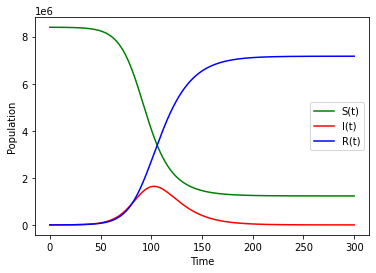

Maximum infected = 1639654.3312721488


In [85]:
init = (8399000, 1033, 0)

# beta has normal distribution
# use np.random.normal()
beta = 3/14
sd_b = 0.03

# gamma has _ distribution
gamma = 1/14

visualize_model(init, 300, beta, gamma)